In [60]:
#pip install parsel

In [4]:
import urllib.request
#import parsel
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
import networkx as nx

In [5]:
# with urllib.request.urlopen('https://www.indiatoday.in/') as response:
#     html = response.read()

In [6]:
# selector = Selector(text=html.decode("utf-8",errors='ignore') )
# pol = selector.css('body').get()

In [7]:
# doc=[]
# class MyDocGen(HTMLParser):
#     def handle_data(self, data):
#         doc.clear()
#         if data.strip()!="":
#             #print(data)
#             doc.append(data)
# #         print("FRom function")
# #         print(doc)

In [8]:

class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            print(data)
           
        

In [9]:
def getDataFromUrl(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
    return html

In [10]:
def getSelector(html):
    selector = Selector(text=html.decode("utf-8",errors='ignore'))
    return selector

In [11]:
def getBody(selector):
    pol = selector.css('body').get()
    return pol

In [12]:
def getUrls(selector):
    urls = selector.xpath('//a/@href').getall()
    return urls

In [13]:
def processQueueElement(url):
    parsedUrl = urlparse(url)
    data = getDataFromUrl(url)
    selector = getSelector(data)
    body = getBody(selector)
    urls = getUrls(selector)
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i
            #print(urls[idx])
    return urls

In [14]:
result={'source':[],'dest':[]} 
class graphLinkInfo :
    def storeGraphlink(graph):
        edges = nx.to_edgelist(graph)
        for edge in edges:
            result['source'].append(edge[0])
            result['dest'].append(edge[1])
        

In [15]:
seedurls=['https://www.indiatoday.in/','https://www.geeksforgeeks.org/',
         'https://www.flipkart.com/','https://en.wikipedia.org/wiki/Cryptography',
          'https://en.wikipedia.org/wiki/Tourism_in_Goa']

for link in seedurls:
    try:
        urllib.request.urlopen(link)
        urls = processQueueElement(link)
        graph = nx.DiGraph()

        for i in urls:
            if not i.startswith("#"):
                graph.add_edge(link,i)
        
        # use the graph to store source -> target link information for each of the 'links'
        graphLinkInfo.storeGraphlink(graph)
    except urllib.error.HTTPError as err:
        print("Hello")
        pass
    


In [16]:
print(result)

{'source': ['https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/', 'https://www.indiatoday.in/'

In [17]:
#graph

In [18]:
#graph.nodes()

In [19]:
#graph.edges()

In [20]:
#nx.draw(graph)

In [21]:
#import matplotlib.pyplot as plt

In [22]:
#plt.savefig("graph1.png")


In [23]:
#plt.show()

In [24]:

#df = nx.to_pandas_adjacency(graph, dtype=int)

In [25]:
#type(df)

In [26]:
#listofedges=nx.to_edgelist(graph,graph.nodes())

In [27]:
print(type(seedurls))
print(seedurls)
    

<class 'list'>
['https://www.indiatoday.in/', 'https://www.geeksforgeeks.org/', 'https://www.flipkart.com/', 'https://en.wikipedia.org/wiki/Cryptography', 'https://en.wikipedia.org/wiki/Tourism_in_Goa']


In [28]:
#for i in seedurls:
backqueue1=[]
backqueue2=[]
backqueue3=[]
backqueue4=[]
backqueue5=[]

src = result['source']
dst = result['dest']
backqueue1.append('https://www.indiatoday.in/')
backqueue2.append('https://www.geeksforgeeks.org/')
backqueue3.append('https://www.flipkart.com/')
backqueue4.append('https://en.wikipedia.org/wiki/Cryptography')
backqueue5.append('https://en.wikipedia.org/wiki/Tourism_in_Goa')

for i in range(0,len(src)):
    if src[i] == 'https://www.indiatoday.in/' :
        backqueue1.append(dst[i])
    if src[i] == 'https://www.geeksforgeeks.org/' :
        backqueue2.append(dst[i])
    if src[i] == 'https://www.flipkart.com/' :
        backqueue3.append(dst[i])
    if src[i] == 'https://en.wikipedia.org/wiki/Cryptography' :
        backqueue4.append(dst[i])
    if src[i] == 'https://en.wikipedia.org/wiki/Tourism_in_Goa' :
        backqueue5.append(dst[i])

print(len(result['dest']))
print(len(backqueue1)+len(backqueue2)+len(backqueue3)+len(backqueue4)+len(backqueue5))

1885
1890


In [29]:
#pip install urlparse

In [30]:
# url='https://www.indiatoday.in/'
# o=urlparse('https://www.indiatoday.in/trending-news')
# print(o.netloc)
# print(type(o.netloc))

# get netloc / domain of the seed urls:
def checkDomain(src,urlBackqueue):
    s=urlparse(src)
    b=urlparse(urlBackqueue)
    if s.netloc == b.netloc:
        return True
    else :
        return False

In [31]:
# checkDomain('https://www.imdb.com/',
#             'https://www.imdb.com/offsite/?page-action=ft-amzn-aud&token=BCYnOxS4YoiAwZio-KOJTLWOdwHDTrRzSiIBiQExndQ6rmVjG3yfTf2tvD6yyctfgVXTbs2--kWp%0D%0A7BXe18CPywWdJv4jU59N_-Ktx9HG9asUXySHpJcXhndKDNZnaX6M06lzd983D7yRcWyMQyvREl9T%0D%0AkU8jh3UFCjCaDJsXQKdA7Sk%0D%0A')

In [32]:
#type(result['dest'][0])
print(seedurls)

['https://www.indiatoday.in/', 'https://www.geeksforgeeks.org/', 'https://www.flipkart.com/', 'https://en.wikipedia.org/wiki/Cryptography', 'https://en.wikipedia.org/wiki/Tourism_in_Goa']


In [33]:
dictHostnameToQueue={'https://www.indiatoday.in/':backqueue1,'https://www.geeksforgeeks.org/':backqueue2,
                     'https://www.flipkart.com/':backqueue3,'https://en.wikipedia.org/wiki/Cryptography':backqueue4,
                     'https://en.wikipedia.org/wiki/Tourism_in_Goa':backqueue5
                     }

In [34]:
print(type(dictHostnameToQueue.get('https://www.indiatoday.in/')))

<class 'list'>


In [35]:
from queue import PriorityQueue
from urllib.parse import urlparse
import urllib.error
minheap=PriorityQueue()
dupcheck = set()
documents=[]
import time
minheap.put((time.time(),seedurls[0]))
minheap.put((time.time(),seedurls[1]))
minheap.put((time.time(),seedurls[2]))
minheap.put((time.time(),seedurls[3]))
minheap.put((time.time(),seedurls[4]))



In [36]:
#print(url[1])

In [37]:
# while not minheap.empty():
#     next_item = minheap.get()
#     print(next_item)
#from random import randint


In [38]:
class mercator_crawler:
    #def __init__(self):
        #self.resultdict = resultdict
        #self.source=source
        #self.minheap = PriorityQueue()
        #self.backqueue=backqueue
        #self.mostrecenttime=time.time()
        
        
    def crawlwebpage(self):
        while len(finaldocuments) < 100 :
            print(len(finaldocuments))
            if minheap.qsize() == 0:
                minheap.put(topheap)
            topheap=minheap.get()
            timestamp=time.time()+2
            if timestamp > topheap[0] :
                print("Sleeping:")
                time.sleep(3)
            self.backqueue=dictHostnameToQueue.get(topheap[1])
            self.source=topheap[1]
            print("Current source url:",self.source)
            #for i in self.backqueue :
            if len(self.backqueue) > 0:
                try:
                    i=self.backqueue.pop()
                    if(checkDomain(self.source,i)):
                        urllib.request.urlopen(i)
                        if i in dupcheck :
                            print("Duplicate doc!")
                            continue
                        # add to document
                        data = getDataFromUrl(i)
                        selector = getSelector(data)
                        body = getBody(selector)
                        parser=MyDocGen()
                        doc1=parser.feed(body.replace("\\n",""))
                        finaldocuments.append(doc)
                        doc.clear()
                        links=processQueueElement(i)                    
                        for j in links:
                            if not(j.startswith("#")) and (checkDomain(self.source,j)):
                                self.backqueue.append(j)
                                print("Adding to backqueue:",self.source,j)
                                dupcheck.add(j)
                    # add to heap
                        print("Put in minheap",time.time()+randint(0, 3),self.source)
                        minheap.put((time.time()+randint(0, 3),self.source))
                    else:
                        print("Not same domain")
                        print("Source",self.source)
                        print("Domain url",i)
                except (urllib.error.URLError,urllib.error.HTTPError,urllib.error.ContentTooShortError) as e1:
                    print('Download error:',e1.reason)
                    continue
                
            else:
                print("Backqueue Empty")
                continue
                                


In [39]:
#minheap.qsize()

In [40]:
# crawl=mercator_crawler()
# crawl.crawlwebpage()

In [41]:
# print((backqueue4[0]))
# # print(len(backqueue2))
# # print(len(backqueue3))
# # print(len(backqueue4))
# print(len(backqueue5))

In [42]:
doc=[]
class MyDocGen(HTMLParser):
    def handle_data(self, data):
        doc.clear()
        if data.strip()!="":
            #print(data)
            doc.append(data)


In [43]:
class MyParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            doc.append(data)

- Manual creation of documents from backqueues:

In [45]:
finaldocuments=[]
itr=0
while ((len(finaldocuments) < 100) or (len(backqueue1) == 0 and len(backqueue2) ==0  and len(backqueue3)== 0  and len(backqueue4) == 0 and len(backqueue5)==0)):
    try:
        #doc.clear()
        
        print("Iteration:",itr)
        
        print("Len of docs",len(finaldocuments))
        index=len(finaldocuments)-1
        if itr > 4:
            itr=0
        
        url=seedurls[itr]
        print("Source",url)
        backqueue=dictHostnameToQueue.get(url)
        if len(backqueue) == 0:
            itr=itr+1
            continue
        i=backqueue.pop()
        #doc.clear()
#         print("Current url",i)
        data = getDataFromUrl(i)
        selector = getSelector(data)
        body = getBody(selector)
        parser=MyParser()
        parser.feed(body.replace("\\n",""))
        temp = doc[:]
        if len(doc) > 0:
            finaldocuments.append(temp)
            
        doc.clear()
        itr=itr+1 

    except (urllib.error.URLError,urllib.error.HTTPError,urllib.error.ContentTooShortError) as e1:
        print('Download error:',e1.reason)
        continue
    

Iteration: 0
Len of docs 0
Source https://www.indiatoday.in/
Iteration: 1
Len of docs 1
Source https://www.geeksforgeeks.org/
Iteration: 2
Len of docs 2
Source https://www.flipkart.com/
Iteration: 3
Len of docs 3
Source https://en.wikipedia.org/wiki/Cryptography
Iteration: 4
Len of docs 4
Source https://en.wikipedia.org/wiki/Tourism_in_Goa
Iteration: 5
Len of docs 5
Source https://www.indiatoday.in/
Iteration: 1
Len of docs 6
Source https://www.geeksforgeeks.org/
Iteration: 2
Len of docs 7
Source https://www.flipkart.com/
Iteration: 3
Len of docs 8
Source https://en.wikipedia.org/wiki/Cryptography
Iteration: 4
Len of docs 9
Source https://en.wikipedia.org/wiki/Tourism_in_Goa
Iteration: 5
Len of docs 10
Source https://www.indiatoday.in/
Iteration: 1
Len of docs 11
Source https://www.geeksforgeeks.org/
Iteration: 2
Len of docs 12
Source https://www.flipkart.com/
Iteration: 3
Len of docs 13
Source https://en.wikipedia.org/wiki/Cryptography
Iteration: 4
Len of docs 14
Source https://en.wik

In [46]:
import numpy as np
import pandas as pd
import nltk

In [74]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
word_list = list()

In [77]:
for temp_list in finaldocuments:
    for string in temp_list:
        if string.isalpha() and string not in sw and string not in word_list:
                word_list.append(string)


Jaccard Similarity of all 100 documents
[[1.0, 0.0, 0.0, 0.0, 0.0, 0.010452961672473868, 0.0, 0.0, 0.0, 0.0, 0.003115264797507788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012605042016806723, 0.0, 0.0, 0.0, 0.0, 0.0037174721189591076, 0.0, 0.002976190476190476, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0058823529411764705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000691085003455425, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.008823529411764706, 0.0007968127490039841, 0.0, 0.00202020202020202, 0.7452574525745257, 0.008823529411764706, 0.0, 0.0023837902264600714, 0.0, 0.5614035087719298, 0.008823529411764706, 0.0, 0.0029585798816568047, 0.007317073170731708, 0.6737804878048781, 0.008823529411764706, 0.0015128593040847202, 0.0025445292620

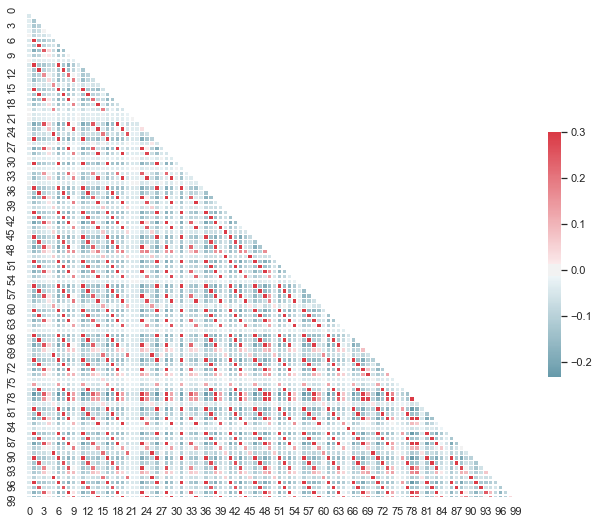

In [78]:
import urllib.request
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
import matplotlib.pyplot as plt
import seaborn as sns

docs = []

for temp_list in finaldocuments:
    temp = set()
    for string in temp_list:
        if string.isalpha() and string not in sw and string not in word_list:
                word_list.append(string)
        temp.add(string)
    docs.append(temp)

matrix = [[0 for x in range(100)] for y in range(100)] 

print("Jaccard Similarity of all 100 documents")
# matrix contains Jaccard Similarity!

for i in range(0,100):
    for j in range(0,100):
        matrix[i][j] = len(docs[i].intersection(docs[j])) / len(docs[i].union(docs[j]))
print(matrix)
df = pd.DataFrame(matrix)

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="white")

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [148]:
boolean_matrix = np.zeros(shape=(len(word_list),100))
for i in range(len(word_list)):
    for j in range(0,100):
        if word_list[i] in docs[j]:
            boolean_matrix[i][j] = 1 
        else:
            boolean_matrix[i][j] = 0

100


In [151]:
import random
permutation = []
i = 1
while i <= 20:
      permutation.append(random.sample(range(0, len(boolean_matrix)), len(boolean_matrix)))
      i = i + 1


In [172]:
signature = []
no_permutation = 0
s = len(boolean_matrix[0])
rang_e = len(boolean_matrix) - 1
while no_permutation < 20:
  arr = np.zeros((s,), dtype = int)
  arr = arr.tolist()
  temp = permutation[no_permutation]
  i = 0
  while i <= rang_e:
    index = 0
    while temp[index] != i:
      index = index + 1 
    j = 0
    while j < s:
      if boolean_matrix[index][j] == 1 and arr[j] == 0:
        arr[j] = i + 1
      j = j + 1
    i = i + 1
  no_permutation = no_permutation + 1
  signature.append(arr)

In [206]:
singature_docs = []

for i in range(0,100):
    temp = set()
    for temp_list in signature:
        temp.add(temp_list[i])
    singature_docs.append(temp)
print(len(singature_docs))

100


In [207]:
# Jaccard Similarity of each 
j_s = [[0 for x in range(100)] for y in range(100)] 

for i in range(0,100):
    for j in range(0,100):
        j_s[i][j] = len(singature_docs[i].intersection(singature_docs[j])) / len(singature_docs[i].union(singature_docs[j]))
print(j_s)

[[1.0, 0.0, 0.02702702702702703, 0.0, 0.02631578947368421, 0.08333333333333333, 0.0, 0.02702702702702703, 0.029411764705882353, 0.027777777777777776, 0.0, 0.02702702702702703, 0.02702702702702703, 0.0, 0.02702702702702703, 0.0, 0.02702702702702703, 0.02702702702702703, 0.0, 0.02702702702702703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02702702702702703, 0.02631578947368421, 0.02857142857142857, 0.02631578947368421, 0.0, 0.0, 0.0, 0.029411764705882353, 0.02702702702702703, 0.0, 0.0, 0.0, 0.0, 0.02702702702702703, 0.0, 0.05405405405405406, 0.0, 0.029411764705882353, 0.02631578947368421, 0.0, 0.029411764705882353, 0.0, 0.030303030303030304, 0.02702702702702703, 0.0, 0.0, 0.02702702702702703, 0.02857142857142857, 0.027777777777777776, 0.0, 0.0, 0.0, 0.02702702702702703, 0.02702702702702703, 0.0, 0.02631578947368421, 0.02702702702702703, 0.030303030303030304, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.02702702702702703, 0.0, 0.0, 0.0, 0.0, 0.02631578947368421, 0.0, 0.0, 0.0, 0.0, 0.02631578947368

In [208]:
df = pd.DataFrame(signature)

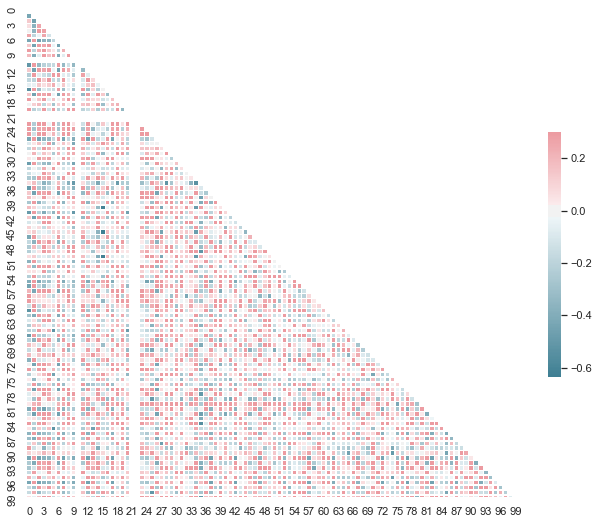

In [209]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
sns.set(style="white")

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})